#Punto 2 – Solución Sugerida


In [ ]:
# Cargar las librerías necesarias
if (!require('caret')) install.packages('caret')
if (!require('e1071')) install.packages('e1071')
if (!require('pROC')) install.packages('pROC')

Loading required package: caret

Loading required package: ggplot2

Loading required package: lattice



Resultados para umbral de probabilidad = 0.3 :
          Reference
Prediction <=50K >50K
     <=50K  1453  114
     >50K    452  481
         Sensitivity          Specificity       Pos Pred Value 
           0.7627297            0.8084034            0.9272495 
      Neg Pred Value            Precision               Recall 
           0.5155413            0.9272495            0.7627297 
                  F1           Prevalence       Detection Rate 
           0.8369816            0.7620000            0.5812000 
Detection Prevalence    Balanced Accuracy 
           0.6268000            0.7855665 
Resultados para umbral de probabilidad = 0.5 :
          Reference
Prediction <=50K >50K
     <=50K  1536  143
     >50K    369  452
         Sensitivity          Specificity       Pos Pred Value 
           0.8062992            0.7596639            0.9148303 
      Neg Pred Value            Precision               Recall 
           0.5505481            0.9148303            0.8062992 
        

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC = 0.871961 


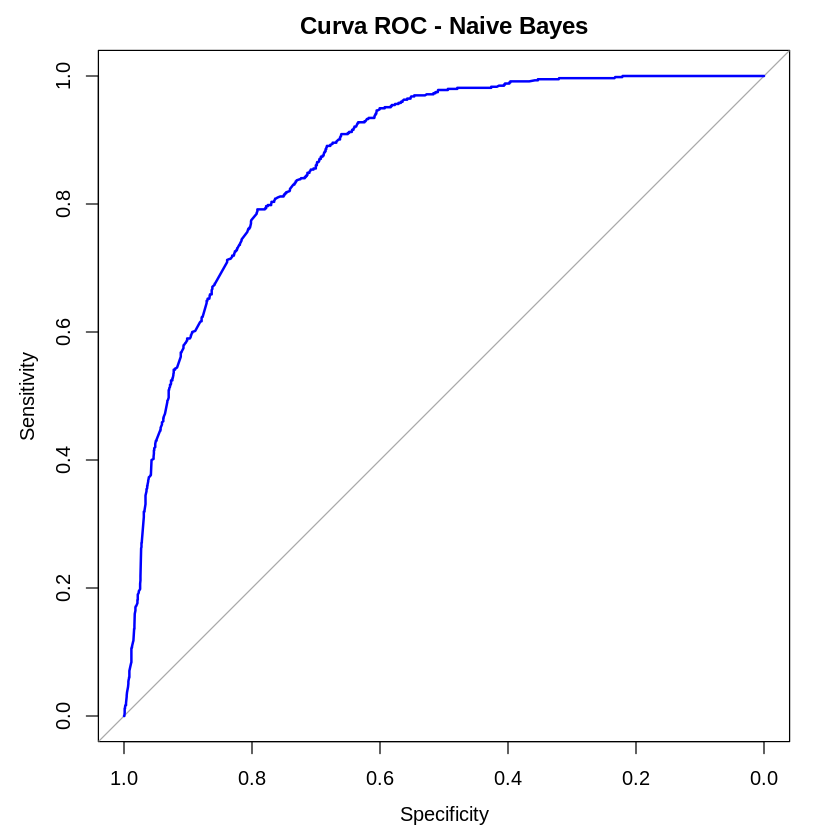

In [ ]:
set.seed(814)

df <- read.csv('/content/Censo.csv')

set.seed(814)
sample <- sample.int(nrow(df), 10000)
df_sample <- df[sample, ]

df_categoricas <- df_sample[, c('workclass', 'education', 'marital.status', 'occupation',
                                'relationship', 'race', 'gender', 'native.country', 'income')]

set.seed(814)
sample_train <- sample.int(nrow(df_categoricas), floor(0.75 * nrow(df_categoricas)))
train_data <- df_categoricas[sample_train, ]
test_data <- df_categoricas[-sample_train, ]

train_data$income <- as.factor(train_data$income)
test_data$income <- as.factor(test_data$income)

naive_model <- naiveBayes(income ~ ., data = train_data)

pred_naive_prob <- predict(naive_model, test_data, type = "raw")

umbrales <- c(0.3, 0.5, 0.7)
for (umbral in umbrales) {
  pred_naive <- ifelse(pred_naive_prob[, 2] > umbral, '>50K', '<=50K')
  pred_naive <- factor(pred_naive, levels = levels(test_data$income))

  cat("Resultados para umbral de probabilidad =", umbral, ":\n")
  conf <- confusionMatrix(pred_naive, test_data$income)
  print(conf$table)
  print(conf$byClass)
}

library(pROC)
roc_curve <- roc(as.numeric(test_data$income == '>50K'), pred_naive_prob[, 2])
plot(roc_curve, col = "blue", main = "Curva ROC - Naive Bayes")
auc_value <- auc(roc_curve)
cat("AUC =", auc_value, "\n")



- **Umbral = 0.3**:
  - **Sensibilidad**: 0.7627
  - **Especificidad**: 0.8084
  - **Precisión**: 0.9272
  - **F1 Score**: 0.8370
  - **Balanced Accuracy**: 0.7856

- **Umbral = 0.5**:
  - **Sensibilidad**: 0.8063
  - **Especificidad**: 0.7597
  - **Precisión**: 0.9148
  - **F1 Score**: 0.8571
  - **Balanced Accuracy**: 0.7830

- **Umbral = 0.7**:
  - **Sensibilidad**: 0.8971
  - **Especificidad**: 0.5899
  - **Precisión**: 0.8751
  - **F1 Score**: 0.8860
  - **Balanced Accuracy**: 0.7435


El umbral de 0.7 es el mejor para encontrar a las personas que ganan más de 50K, porque tiene el mejor equilibrio entre precisión y recall. Sin embargo, esto significa que podríamos perder algo de especificidad, lo que podría ser importante dependiendo del problema.

Si queremos asegurarnos de encontrar a la mayoría de las personas que ganan más de 50K, el umbral de 0.7 es el mejor. Pero si necesitamos un equilibrio entre encontrar a estas personas y no equivocarnos demasiado, el umbral de 0.5 podría ser una buena opción.